In [2]:
import pandas as pd
import numpy as np
import glob
import gzip
import shutil
import os
from tqdm import tqdm
print(os.getcwd())

/Users/mayanahar/Capstone/bin/Capstone-1


In [19]:
# set infinite display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
# change to the directory where the data is stored
os.chdir('/Users/mayanahar/Capstone/bin/Capstone')
print(os.getcwd())

/Users/mayanahar/Capstone/bin/Capstone


In [4]:
# # List all files in the ../../data directory
# file_dir = '../../data'
# filenames = os.listdir(file_dir)

# # Separate files into those ending with "sur.tsv" and those not ending with it
# sur = [file for file in filenames if file.endswith('sur.tsv')]
# not_sur = [file for file in filenames if not file.endswith('sur.tsv')]

# # Create a DataFrame from the files ending in "sur.tsv"
# sur_df = pd.DataFrame()
# for file in sur:
#     file_path = os.path.join(file_dir, file)
#     df = pd.read_csv(file_path, sep='\t', header=0)
#     df['filename'] = file  # Add a column with the filename
#     sur_df = pd.concat([sur_df, df], ignore_index=True)

# # Create a DataFrame from the files not ending in "sur.tsv"
# not_sur_df = pd.DataFrame()
# for file in not_sur:
#     file_path = os.path.join(file_dir, file)
#     df = pd.read_csv(file_path, sep='\t', header=0)
#     df['filename'] = file  # Add a column with the filename
#     not_sur_df = pd.concat([not_sur_df, df], ignore_index=True)

In [5]:
# convert tsv into dataframe
df = pd.read_csv('../../data/CPTAC-3.bio_repl_query.sur.tsv', sep='\t', header=0)
df2 = pd.read_csv('../../data/CPTAC-3.gdc_repl_query.tsv', sep='\t', header=0)

In [6]:
# preview dataframe
df.head()

# get shape of the dataframe
df.shape

(6702, 22)

In [7]:
# preview other dataframe
df2.head()

# get shape of the dataframe
df2.shape

(1219, 117)

In [8]:
# join both by case_id and keep all rows
df3 = pd.merge(df2, df, on='case_id', how='outer')

# preview joined dataframe
df3.head()

# get shape of the dataframe
df3.shape

(6706, 138)

In [21]:
# preview joined dataframe
df3.head()

,case_id,demographic_id,diagnosis_id,batch_id,disease_type_x,index_date,primary_site_x,project_id_x,cause_of_death,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,adrenal_hormone,age_at_diagnosis,ajcc_clinical_m,ajcc_clinical_n,ajcc_clinical_stage,ajcc_clinical_t,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_staging_system_edition,ann_arbor_b_symptoms,ann_arbor_b_symptoms_described,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,ann_arbor_pathologic_stage,best_overall_response,burkitt_lymphoma_clinical_variant,child_pugh_classification,classification_of_tumor,cog_liver_stage,cog_neuroblastoma_risk_group,cog_renal_stage,cog_rhabdomyosarcoma_risk_group,created_datetime,days_to_best_overall_response,days_to_diagnosis,days_to_last_follow_up,days_to_last_known_disease_status,days_to_recurrence,diagnosis_is_primary_disease,eln_risk_classification,enneking_msts_grade,enneking_msts_metastasis,enneking_msts_stage,enneking_msts_tumor_site,esophageal_columnar_dysplasia_degree,esophageal_columnar_metaplasia_present,figo_stage,figo_staging_edition_year,first_symptom_prior_to_diagnosis,gastric_esophageal_junction_involvement,gleason_grade_group,gleason_grade_tertiary,gleason_patterns_percent,goblet_cells_columnar_mucosa_present,icd_10_code,igcccg_stage,inpc_grade,inpc_histologic_group,inrg_stage,inss_stage,international_prognostic_index,irs_group,irs_stage,ishak_fibrosis_score,iss_stage,last_known_disease_status,laterality,margin_distance,margins_involved_site,masaoka_stage,medulloblastoma_molecular_classification,metastasis_at_diagnosis,metastasis_at_diagnosis_site,method_of_diagnosis,micropapillary_features,mitosis_karyorrhexis_index,mitotic_count,morphology,ovarian_specimen_status,ovarian_surface_involvement,papillary_renal_cell_type,peritoneal_fluid_cytological_status,pregnant_at_diagnosis,primary_diagnosis,primary_disease,primary_gleason_grade,prior_malignancy,prior_treatment,progression_or_recurrence,project_id.1,residual_disease,satellite_nodule_present,secondary_gleason_grade,site_of_resection_or_biopsy,sites_of_involvement,submitter_id,supratentorial_localization,synchronous_malignancy,tissue_or_organ_of_origin,tumor_confined_to_organ_of_origin,tumor_depth,tumor_focality,tumor_grade,tumor_regression_grade,updated_datetime,weiss_assessment_score,who_cns_grade,who_nte_grade,wilms_tumor_histologic_subtype,year_of_diagnosis,aliquot_id,read_group_id,disease_type_y,has_blood_cancer,primary_site_y,project_id_y,tissue_type,instrument_model,RIN,includes_spike_ins,library_preparation_kit_name,library_preparation_kit_vendor,library_preparation_kit_version,library_preparation_kit_catalog_number,library_selection,library_strand,library_strategy,size_selection_range,spike_ins_concentration
0,f28fc405-1fac-4ee0-b398-e0ddf7b4e639,aa2cc284-5645-40eb-a95a-dbb391711d9b,01282185-756e-42f0-a78c-69afa886f38a,4.0,Squamous Cell Neoplasms,Diagnosis,Bronchus and lung,CPTAC-3,NaN,-27320.0,3.0,not reported,male,white,Dead,NaN,27320.0,NaN,NaN,NaN,NaN,NaN,NaN,Stage IIA,NaN,7th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-03T12:05:16.846188-06:00,NaN,NaN,3.0,3.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tumor free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8070/3,NaN,NaN,NaN,NaN,NaN,"Squamous cell carcinoma, NOS",NaN,NaN,NaN,NaN,no,CPTAC-3,RX,NaN,NaN,"Middle lobe, lung",NaN,C3L-00445-DIAG,NaN,NaN,"Middle lobe, lung",NaN,NaN,Unifocal,G2,NaN,2021-09-22T14:36:32.037275-05:00,NaN,NaN,NaN,NaN,2017.0,f6a28d82-7623-4ef1-ace8-1b8fdb69ad09,3aaad192-23ce-4f03-bcb2-f3cbe355c5a6,Squamous Cell Neoplasms,False,Bronchus and lung,CPTAC-3,Normal,Illumina HiSeq 4000,NaN,True,TruSeq Stranded Total RNA Library Prep Kit wit...,Illumina,NaN,NaN,rRNA Depletion,First_Stranded,RNA-Seq,310.0,1.0
1,f28fc405-1fac-4ee0-b398-e0ddf7b4e639,aa2cc284-5645-40eb-a95a-dbb391711d9b,01282185-756e-42f0-a78c-69afa886f38a,4.0,Squamous Cell Neoplasms,Diagnosis

In [10]:
# remove the column read_pair_number and submitted_unaligned_reads_id
df3 = df3.drop(['read_pair_number'], axis=1)
df3 = df3.drop(['submitted_unaligned_reads_id'], axis=1)

# drop duplicated and save as new dataframe
df4 = df3.drop_duplicates()

# print shape of the old and new dataframes
print(df3.shape)
print(df4.shape)

(6706, 136)
(3355, 136)


In [11]:
# save the dataframe
# df3.to_csv('CPTAC-3.bio_gdc_repl_query.tsv', sep='\t', index=False)

In [24]:
# import filenames inside of ./local_results into list
filenames = glob.glob("../../data/local_results/sf/*")

# only keep filenames with .salmon in them
filenames = [x for x in filenames if '.salmon' in x]

In [25]:
# only keep everything before the first period and after the last /
filenames = [x.split('/')[-1].split('.')[0] for x in filenames]

# filenames length
len(filenames)

133

In [26]:
# see if the filenames match the case_id's in the dataframe
output = []
for x in filenames:
    if x not in df3['read_group_id'].values:
        output.append(x)
        
print(output)
print(len(filenames))
print(len(output))

[]
133
0


In [41]:
#create new dataframe using filemames and only keep the rows that have read_group_id equal to something in filenames
df5 = df4[df4['read_group_id'].isin(filenames)]
 

In [35]:
df5.head()

,case_id,demographic_id,diagnosis_id,batch_id,disease_type_x,index_date,primary_site_x,project_id_x,cause_of_death,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,adrenal_hormone,age_at_diagnosis,ajcc_clinical_m,ajcc_clinical_n,ajcc_clinical_stage,ajcc_clinical_t,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_staging_system_edition,ann_arbor_b_symptoms,ann_arbor_b_symptoms_described,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,ann_arbor_pathologic_stage,best_overall_response,burkitt_lymphoma_clinical_variant,child_pugh_classification,classification_of_tumor,cog_liver_stage,cog_neuroblastoma_risk_group,cog_renal_stage,cog_rhabdomyosarcoma_risk_group,created_datetime,days_to_best_overall_response,days_to_diagnosis,days_to_last_follow_up,days_to_last_known_disease_status,days_to_recurrence,diagnosis_is_primary_disease,eln_risk_classification,enneking_msts_grade,enneking_msts_metastasis,enneking_msts_stage,enneking_msts_tumor_site,esophageal_columnar_dysplasia_degree,esophageal_columnar_metaplasia_present,figo_stage,figo_staging_edition_year,first_symptom_prior_to_diagnosis,gastric_esophageal_junction_involvement,gleason_grade_group,gleason_grade_tertiary,gleason_patterns_percent,goblet_cells_columnar_mucosa_present,icd_10_code,igcccg_stage,inpc_grade,inpc_histologic_group,inrg_stage,inss_stage,international_prognostic_index,irs_group,irs_stage,ishak_fibrosis_score,iss_stage,last_known_disease_status,laterality,margin_distance,margins_involved_site,masaoka_stage,medulloblastoma_molecular_classification,metastasis_at_diagnosis,metastasis_at_diagnosis_site,method_of_diagnosis,micropapillary_features,mitosis_karyorrhexis_index,mitotic_count,morphology,ovarian_specimen_status,ovarian_surface_involvement,papillary_renal_cell_type,peritoneal_fluid_cytological_status,pregnant_at_diagnosis,primary_diagnosis,primary_disease,primary_gleason_grade,prior_malignancy,prior_treatment,progression_or_recurrence,project_id.1,residual_disease,satellite_nodule_present,secondary_gleason_grade,site_of_resection_or_biopsy,sites_of_involvement,submitter_id,supratentorial_localization,synchronous_malignancy,tissue_or_organ_of_origin,tumor_confined_to_organ_of_origin,tumor_depth,tumor_focality,tumor_grade,tumor_regression_grade,updated_datetime,weiss_assessment_score,who_cns_grade,who_nte_grade,wilms_tumor_histologic_subtype,year_of_diagnosis,aliquot_id,read_group_id,disease_type_y,has_blood_cancer,primary_site_y,project_id_y,tissue_type,instrument_model,RIN,includes_spike_ins,library_preparation_kit_name,library_preparation_kit_vendor,library_preparation_kit_version,library_preparation_kit_catalog_number,library_selection,library_strand,library_strategy,size_selection_range,spike_ins_concentration
112,d84f3320-60b0-4362-b5ae-7b1b120979a2,351721da-9a64-46b6-bccf-2b986f21e832,4eed2967-a1b9-4b07-b2c0-48ec6debd831,4.0,Squamous Cell Neoplasms,Diagnosis,Bronchus and lung,CPTAC-3,NaN,-23841.0,NaN,not reported,male,asian,Alive,NaN,23841.0,NaN,NaN,NaN,NaN,NaN,NaN,Stage IB,NaN,7th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-03T12:05:16.846188-06:00,NaN,NaN,403.0,403.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tumor free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8070/3,NaN,NaN,NaN,NaN,NaN,"Squamous cell carcinoma, NOS",NaN,NaN,NaN,NaN,no,CPTAC-3,R0,NaN,NaN,"Lung, NOS",NaN,C3N-01020-DIAG,NaN,NaN,"Lung, NOS",NaN,NaN,Unifocal,G3,NaN,2021-09-22T14:36:32.037275-05:00,NaN,NaN,NaN,NaN,2017.0,2b0a3602-d13b-43c4-9f99-610dec4fcf96,c1810e61-02b1-40be-989f-964b4de26af4,Squamous Cell Neoplasms,False,Bronchus and lung,CPTAC-3,Tumor,Illumina HiSeq 4000,NaN,True,TruSeq Stranded Total RNA Library Prep Kit wit...,Illumina,NaN,NaN,rRNA Depletion,First_Stranded,RNA-Seq,312.0,1.0
118,8f7bf749-60a0-4007-a75b-212e065d3e95,eb2066d7-bf17-469d-b49f-eea8d1971351,e53f9af2-ebbf-423a-b719-cf2537f390e4,4.0,Squamous Cell Neoplasms,Diagnosis,Bronchus

In [36]:
df5.shape

(133, 136)

In [37]:
#show the most common value of disease_type_x in df5
df5['disease_type_x'].value_counts()


Adenomas and Adenocarcinomas    52
Squamous Cell Neoplasms         21
Ductal and Lobular Neoplasms    11
Gliomas                          4
Name: disease_type_x, dtype: int64

/var/folders/j4/1x0dc4g11wg0cfys1nmslw040000gn/T/ipykernel_13907/732354384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['age_at_diagnosis'] = df5['age_at_diagnosis']/365


<Axes: title={'center': 'age_at_diagnosis'}, xlabel='disease_type_x'>

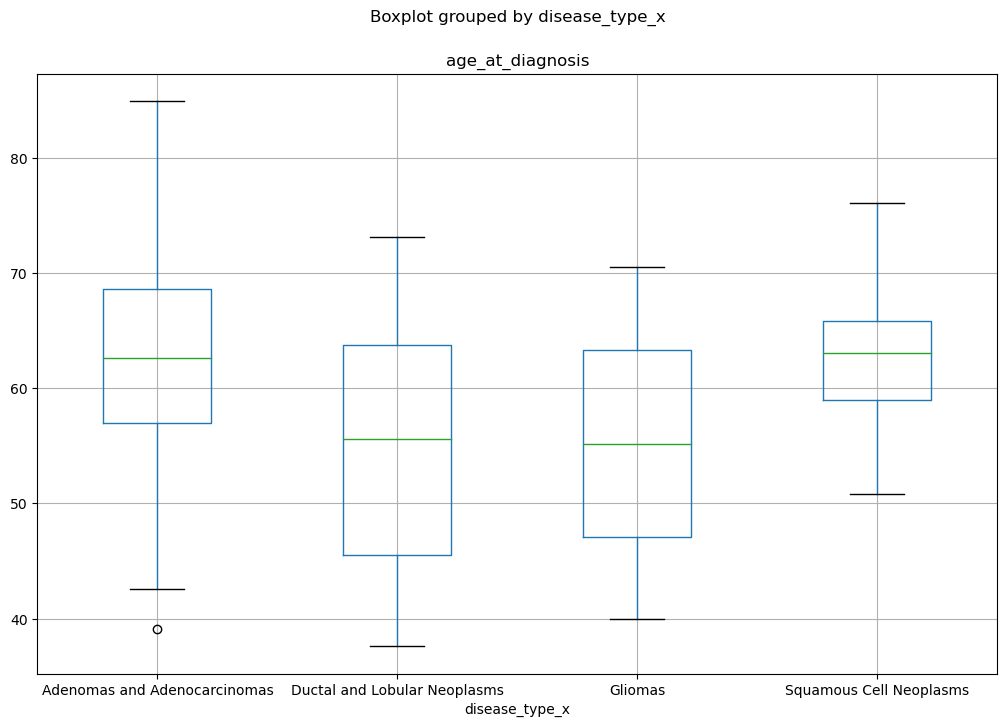

In [42]:
#plot box plot of age_at_diagnosis (convert to years) for each disease_type_x
df5['age_at_diagnosis'] = df5['age_at_diagnosis']/365
df5.boxplot(column='age_at_diagnosis', by='disease_type_x', figsize=(12,8))

In [43]:
#find missingness for age_at_diagnosis, race, and gender
print(df5['age_at_diagnosis'].isnull().sum())


49


In [44]:
print(df5['race'].isnull().sum())

45


In [45]:
print(df5['gender'].isnull().sum())

45


In [46]:
#run a chi square test to see if disease_type_x is significantly different because of gender using df5
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Assuming that df5 is a DataFrame with 'disease_type_x' and 'gender' columns
contingency_table = pd.crosstab(df5['disease_type_x'], df5['gender'])

# Perform Chi-Square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistic, p-value and degrees of freedom
print(f"Test statistic: {stat}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Print the expected contingency table
print("Expected contingency table:")
print(expected)


Test statistic: 10.467848231823389
P-value: 0.01498059479208916
Degrees of freedom: 3
Expected contingency table:
[[24.81818182 27.18181818]
 [ 5.25        5.75      ]
 [ 1.90909091  2.09090909]
 [10.02272727 10.97727273]]


In [47]:
#run a chi square test to see if disease_type_x is significantly different because of race using df5
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Assuming that df5 is a DataFrame with 'disease_type_x' and 'race' columns
contingency_table = pd.crosstab(df5['disease_type_x'], df5['race'])

# Perform Chi-Square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistic, p-value and degrees of freedom
print(f"Test statistic: {stat}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Print the expected contingency table
print("Expected contingency table:")
print(expected)

Test statistic: 3.9155705467072113
P-value: 0.6881009853694183
Degrees of freedom: 6
Expected contingency table:
[[10.04545455  8.27272727 33.68181818]
 [ 2.125       1.75        7.125     ]
 [ 0.77272727  0.63636364  2.59090909]
 [ 4.05681818  3.34090909 13.60227273]]


In [15]:
source_dir = "../../data/local_results/"  # Change this to the source directory where your .sf.gz files are located
destination_dir = "../../data/local_results/sf"

# Get a list of all files in the source directory
filenames = os.listdir(source_dir)

for filename in filenames:
    if filename.endswith('.sf.gz'):
        source_path = os.path.join(source_dir, filename)
        destination_path = os.path.join(destination_dir, filename[:-3])
        
        with gzip.open(source_path, 'rb') as f_in:
            with open(destination_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

KeyboardInterrupt: 

In [ ]:
# create a list of filenames in the sf directory
filenames = os.listdir("../../data/local_results/sf/")

for file in filenames:
    preview = pd.read_csv("../../data/local_results/sf/" + file, sep='\t', header=0)
    print(preview.head())
    break

                Name  Length  EffectiveLength       TPM  NumReads
0  ENST00000456328.2    1657          1894.15  0.088142     8.876
1  ENST00000450305.2     632           486.00  0.000000     0.000
2  ENST00000488147.1    1351          1713.90  3.235923   294.850
3  ENST00000619216.1      68            68.00  0.000000     0.000
4  ENST00000473358.1     712           566.00  0.000000     0.000


In [ ]:
# rewrite the sf files to only have the Name and TPM columns
for file in tqdm(filenames):
    df = pd.read_csv("../../data/local_results/sf/" + file, sep='\t', header=0)
    df = df[['Name', 'TPM']]
    df.to_csv("../../data/local_results/sf/" + file, sep='\t', index=False)

# add the text of the newly generated sf files to df3 in a new column
df3['sf'] = ''
for file in tqdm(filenames):
    df = pd.read_csv("../../data/local_results/sf/" + file, sep='\t', header=0)
    df3.loc[df3['read_group_id'] == file[:-3], 'sf'] = df.to_string(header=False, index=False)

In [ ]:
filenames = os.listdir("../../data/local_results/sf/")
for index, row in tqdm(df3.iterrows(), total=len(df3)):
    read_group_id = row['read_group_id']
    for file in filenames:
        if read_group_id in file:
            df = pd.read_csv("../../data/local_results/sf/" + file, sep='\t', header=0)
            df = df[['Name', 'TPM']]
            # Rename 'Name' to 'transcript_id'
            df = df.rename(columns={'Name': 'transcript_id'})
            # Place transcript_count into a new column
            df3.at[index, 'transcript_count'] = df.to_string(header=False, index=False)
        else:
            continue

  0%|          | 0/6706 [00:00<?, ?it/s]

  5%|▌         | 368/6706 [00:59<16:59,  6.22it/s]


TypeError: 'in <string>' requires string as left operand, not float